<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week09/kmeans_clustering_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQ8RFVjiTdVKNZfDw_wbgzrI9MjcqU3U_jJXQjeEA1bKqJZu8x-FDKAwnilzeauvEjQZOvpZR4ACA0s/pub?output=csv'
wine = pd.read_csv(url)
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
# We will only use two features for this example
df = wine[['malic_acid', 'flavanoids']]
df.head()

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,1.76,3.39


In [4]:
# Instantiate a scaler
scaler = StandardScaler()
# Scale the data
scaled_df = scaler.fit_transform(df)

Text(0, 0.5, 'Flavanoids')

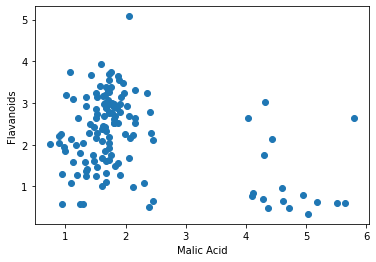

In [5]:
# Visualize the data
plt.scatter(df['malic_acid'], df['flavanoids']);
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')

In [6]:
# Instantiate KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)

KMeans(n_clusters=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


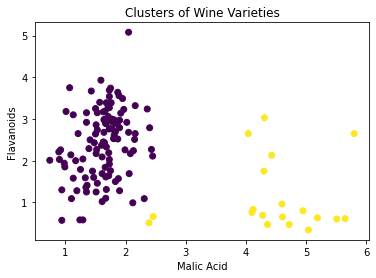

In [7]:
# Save the cluster labels to the data frame
df['clusters'] = kmeans.labels_
plt.scatter(df['malic_acid'], df['flavanoids'], c = df['clusters']);
plt.xlabel('Malic Acid');
plt.ylabel('Flavanoids');
plt.title('Clusters of Wine Varieties');